# Homework 4: Decision Tree
## Author: Calvin Henggeler
## Dataset: county_info

1) Begin with the same data set, feature set, and target variable as Homework 2: linear regression, PCA,
2) Split the data into train/validation/test subsets.
3) Train a decision tree and a linear model on the training data, score them each on the training data, then score them each on the validation data. Write a few sentences with any observations you have about the four accuracies.
4) Report the depth of the tree which was fitted to the data.
5) Now optimize the max_depth hyperparameter.
6) Repeat steps 4 and 5 using entropy instead of gini impurity.
7) Select the optimum criterion and max_depth. Compare the accuracy of this model to that of the linear model on the validation data.
8) Select the best-performing model on the validation data, and report the accuracy of this model on the test set.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### Begin with same dataset, feature set and target variable

In [3]:
df = pd.read_csv('../data/county_info.csv')

Calculate annual population and housing value growth rate

In [4]:
# Compound Annual Growth Rate = ( (EV/BV)^(1/n) - 1 ) * 100 where
# BV: Beginning value
# EV: Ending value
# n : Number of years
# https://www.investopedia.com/terms/c/cagr.asp#:~:text=Divide%20the%20value%20of%20an,the%20answer%20into%20a%20percentage.

# Annual population growth rate percentage
df['annual_pop_growth_rate'] = ((df['pop_in_later_year']/df['pop_in_2000'])**(1/(df['pop_ref_later_year']-2000))-1) * 100

# Annual House value growth rate percentage
df['annual_house_value_growth_rate'] = ((df['median_house_value_2017']/df['median_house_value_2000'])**(1/(2017-2000))-1) * 100

Define Features and Target Variable

In [5]:
features =  ['pop_foreign_born' , 'adult_obes_rate', 'pop_per_sq_mi','pop_percent_urban', 'poverty_pct', 'median_house_income_ref_val', 'median_house_income_ref_yr', 'median_house_income_2017', 'cost_of_living_usd','annual_pop_growth_rate', 'annual_house_value_growth_rate']

target =    ['median_house_value_2000']

df = df[features+target]
df = df.dropna()

In [6]:
df.head()

,pop_foreign_born,adult_obes_rate,pop_per_sq_mi,pop_percent_urban,poverty_pct,median_house_income_ref_val,median_house_income_ref_yr,median_house_income_2017,cost_of_living_usd,annual_pop_growth_rate,annual_house_value_growth_rate,median_house_value_2000
0,1170.0,30.0,93,58.0,12.9,42013,1999,57282,86.5,1.399308,3.698346,82500.0
1,10881.0,24.5,133,58.0,9.4,40250,1999,55342,86.9,2.470867,3.839544,105300.0
2,701.0,36.4,30,32.0,25.6,25101,1999,34553,82.2,-0.574206,3.062253,57200.0
3,232.0,31.7,36,32.0,14.3,31420,1999,44946,82.7,0.505782,4.056521,57400.0
4,2638.0,31.5,90,10.0,14.7,35241,1999,49096,82.6,0.751747,3.169685,76900.0


### Split to Train-Test-Validation Sets

In [9]:
x_tr, x_temp, y_tr, y_temp = train_test_split(df[features], df[target],
                                              test_size=0.4, random_state=0)
x_va, x_te, y_va, y_te = train_test_split(x_temp, y_temp,
                                          test_size=0.5, random_state=0)

### Train a decision tree and a linear model on the training data, score them each on the training data, then score them each on the validation data.
Write a few sentences with any observations you have about the four accuracies

In [10]:
# Instantiate the regression models
lr = LinearRegression()
tree = DecisionTreeRegressor()

In [11]:
# Train the models
lr.fit(x_tr, y_tr)
tree.fit(x_tr, y_tr)

DecisionTreeRegressor()

In [12]:
# Score models on the training set
lr_tr_score = lr.score(x_tr, y_tr)
tree_tr_score = tree.score(x_tr, y_tr)

In [13]:
# Score models on the validation set
lr_va_score = lr.score(x_va, y_va)
tree_va_score = tree.score(x_va, y_va)

In [14]:
print(f'Training Set Score: LinReg = {lr_tr_score}, Tree = {tree_tr_score}')
print(f'Validation Set Score: LinReg = {lr_va_score}, Tree = {tree_va_score}')

Training Set Score: LinReg = 0.7190103762389861, Tree = 1.0
Validation Set Score: LinReg = 0.7841104402489826, Tree = 0.703648347263492


The difference in performance of the models is very evident. The linear model had pretty good performance on both the training and validation sets. What is interesting is that the two scores from the linear model are somewhat close to each other, which implies that the model is not over fitting that bad and ins generalizing well over the unseen validation set. Conversely, the DecisionTree showed the exact opposite behavior. The perfect performance on the training set and significantly worse performance on the validation set show that the model is extremely over fit.

### Report Tree Depth

In [15]:
tree.get_depth()

27

### Optimize Max Depth Hyperperameter

In [16]:
val_acc = []
train_acc = []
for i in range(1,28):
       tr = DecisionTreeRegressor(max_depth=i, random_state=0)
       tr.fit(x_tr, y_tr)
       val_acc.append(tr.score(x_va, y_va))
       train_acc.append(tr.score(x_tr, y_tr))

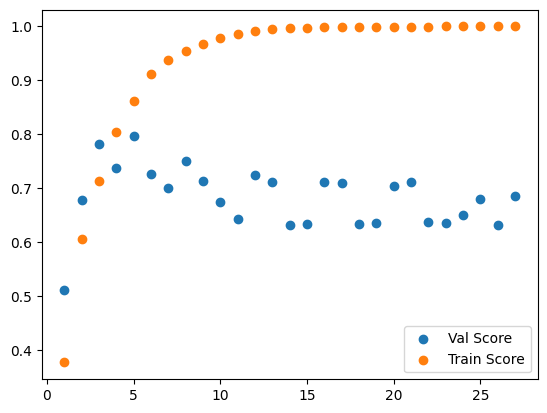

In [22]:
fig, ax = plt.subplots()
plt.scatter(range(1,28), val_acc)
plt.scatter(range(1,28), train_acc)
ax.legend(['Val Score', 'Train Score'])

From eye-balling the graph, a tree depth of 5 seems to be the most optimal depth

## Repeat Optimization with non-default criterion

In [23]:
# Available Decision Tree Regressor Model Criterion
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']

for crit in criterion:
    # Get the max tree depth
    tree = DecisionTreeRegressor(criterion=crit)
    tree.fit(x_tr, y_tr)
    max_depth = tree.get_depth()
    print(f'{crit}: {max_depth}')


squared_error: 27
friedman_mse: 27
absolute_error: 30
poisson: 26


In [26]:
#
# (Default) Squared Error, Depth 5
#

tr = DecisionTreeRegressor(max_depth=5, random_state=0)
tr.fit(x_tr, y_tr)
print('Sqared Error score:',tr.score(x_va, y_va))

Sqared Error score: 0.7977904096391885


Text(0.5, 1.0, 'Friedman MSE')

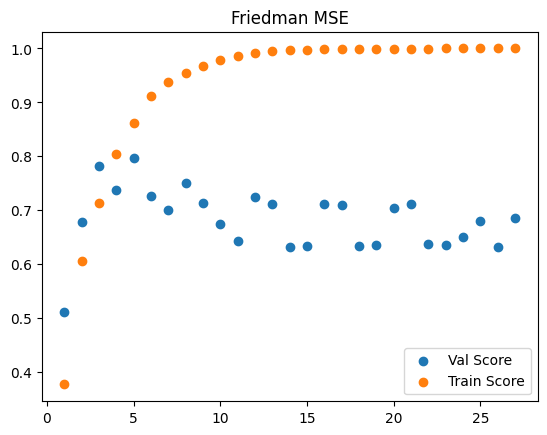

In [25]:
#
# Friedman MSE
#

val_acc = []
train_acc = []
for i in range(1, 28):
    tr = DecisionTreeRegressor(criterion='friedman_mse' ,max_depth=i, random_state=0)
    tr.fit(x_tr, y_tr)
    val_acc.append(tr.score(x_va, y_va))
    train_acc.append(tr.score(x_tr, y_tr))

fig, ax = plt.subplots()
plt.scatter(range(1, 28), val_acc)
plt.scatter(range(1, 28), train_acc)
ax.legend(['Val Score', 'Train Score'])
ax.set_title('Friedman MSE')

In [28]:
tr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, random_state=0)
tr.fit(x_tr, y_tr)
print('Friedman MSE score:',tr.score(x_va, y_va))

Friedman MSE score: 0.7977904096391885


Text(0.5, 1.0, 'Absolute Error')

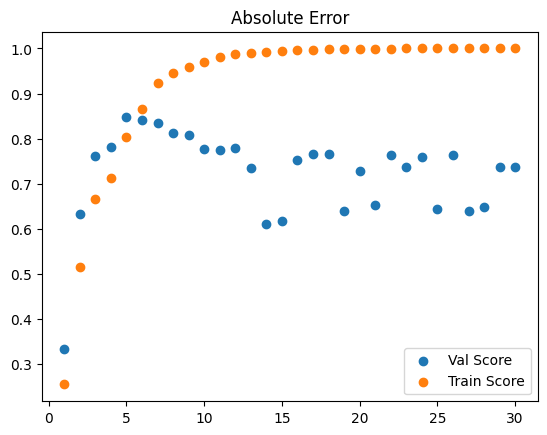

In [33]:
#
# Absolure Error
#

val_acc = []
train_acc = []
for i in range(1, 31):
    tr = DecisionTreeRegressor(criterion='absolute_error', max_depth=i, random_state=0)
    tr.fit(x_tr, y_tr)
    val_acc.append(tr.score(x_va, y_va))
    train_acc.append(tr.score(x_tr, y_tr))

fig, ax = plt.subplots()
plt.scatter(range(1, 31), val_acc)
plt.scatter(range(1, 31), train_acc)
ax.legend(['Val Score', 'Train Score'])
ax.set_title('Absolute Error')

In [38]:
tr = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=0)
tr.fit(x_tr, y_tr)
print('Absolute Error score:', tr.score(x_va, y_va))

Absolute Error score: 0.8479681145065142


Text(0.5, 1.0, 'Poisson')

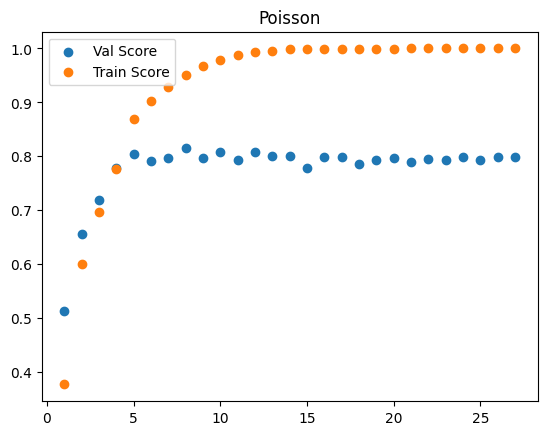

In [31]:
 #
# Poisson
#

val_acc = []
train_acc = []
for i in range(1, 27):
    tr = DecisionTreeRegressor(criterion='poisson', max_depth=i, random_state=0)
    tr.fit(x_tr, y_tr)
    val_acc.append(tr.score(x_va, y_va))
    train_acc.append(tr.score(x_tr, y_tr))

fig, ax = plt.subplots()
plt.scatter(range(1, 27), val_acc)
plt.scatter(range(1, 27), train_acc)
ax.legend(['Val Score', 'Train Score'])
ax.set_title('Poisson')

In [39]:
tr = DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=0)
tr.fit(x_tr, y_tr)
print('Poisson score:', tr.score(x_va, y_va))

Poisson score: 0.8051279105556743


### Select the optimum criterion and max_depth. Compare the accuracy of this model to that of the linear model on the validation data.
Optimum Criteria: Absolute Error
Optimal Max Depth: 5

In [40]:
tree = DecisionTreeRegressor(criterion='absolute_error', max_depth=5)
tree.fit(x_tr, y_tr)

# Score models on the validation set
lr_va_score = lr.score(x_va, y_va)
tree_va_score = tree.score(x_va, y_va)

print(f'Validation Set Score: LinReg = {lr_va_score}, Tree(abs error) = {tree_va_score}')

Validation Set Score: LinReg = 0.7841104402489826, Tree(abs error) = 0.8445945672979698


### Select the best-performing model on the validation data, and report the accuracy of this model on the test set.

In [42]:
print(f'Test Set Score = {tree.score(x_te, y_te)}')

Test Set Score = 0.7234946426690252
